# Assignment 2 Logistic Regression and Decision Tree

Team Member:

Weicheng Cao

Yang Dai

In [28]:
# loading packages
import os
import pandas as pd
import numpy as np

# plotting packages
get_ipython().run_line_magic('matplotlib', 'inline')
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score

from sklearn.metrics import recall_score

from sklearn.metrics import accuracy_score, precision_score, f1_score

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [2]:
#load data
raw = pd.read_excel("LendingClub_Extended_DataSet-4.xlsx")

## Clean data

In [3]:
# show information
raw.info()
print(raw.isnull().sum())

# Removing any row in the DataFrame with less than 38 non-NaN values
raw = raw.dropna(axis=0, thresh=38)

# Dropping rows with NaN in 'dti', 'emp_length', and 'bc_util' columns
raw = raw.dropna(subset=['dti'])
raw = raw.dropna(subset=['emp_length'])
raw = raw.dropna(subset=['bc_util'])

# Replacing NaN values in 'mths_since_recent_inq' column with the column's median value
raw['mths_since_recent_inq']=raw['mths_since_recent_inq'].fillna(raw['mths_since_recent_inq'].median())

# Dropping 'addr_state', 'earliest_cr_line' and 'title' columns from the DataFrame
raw = raw.drop(['addr_state', 'earliest_cr_line'], axis=1)
raw = raw.drop(['title'], axis=1)

# Replacing 'Verified' and 'Source Verified' with 1, and 'Not Verified' with 0 in 'verification_status' column
raw['verification_status'] = raw['verification_status'].replace(['Verified','Source Verified'],1)
raw['verification_status'] = raw['verification_status'].replace(['Not Verified'],0)

# Replacing 'debt_consolidation' with 1, and every other unique value with 0 in 'purpose' column
raw.loc[raw['purpose']=='debt_consolidation', 'purpose']=1
raw.loc[(raw['purpose']!=1) &(raw['purpose']!='debt_consolidation'), 'purpose']=0

# Replacing 'Current' and 'Fully Paid' with 1, and every other unique value with 0 in 'loan_status' column
raw.loc[(raw['loan_status']=='Current') | (raw['loan_status']=='Fully Paid'), 'loan_status']=1
raw.loc[(raw['loan_status']!=1) & (raw['loan_status']!='Current') &  (raw['loan_status']!='Fully Paid'), 'loan_status']=0

# One-hot encoding 'term' and 'home_ownership' columns and dropping the first category
raw = pd.get_dummies(raw, columns=['term'],  drop_first=True)
raw = pd.get_dummies(raw, columns=['home_ownership'],  drop_first=True)

# Cleaning up 'emp_length' column by replacing '10+ years' with '10', '< 1 year' with '0', and removing 'years' and 'year' strings.
# Afterwards, converting 'emp_length' to integer data type
raw['emp_length'] = raw['emp_length'].replace('10+ years', '10')
raw['emp_length'] = raw['emp_length'].replace('< 1 year', '0')
raw['emp_length'] = raw['emp_length'].str.replace('years', '')
raw['emp_length'] = raw['emp_length'].str.replace('year', '')
raw['emp_length'] = raw['emp_length'].astype(int)

# Dropping the first column of the DataFrame
raw=raw.iloc[:,1:]

# Checking the information of the cleaned DataFrame
raw.info()
print(raw.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0                  25000 non-null  int64         
 1   loan_amnt                   24999 non-null  float64       
 2   term                        24999 non-null  object        
 3   int_rate                    24999 non-null  float64       
 4   emp_length                  23498 non-null  object        
 5   home_ownership              24999 non-null  object        
 6   annual_inc                  24999 non-null  float64       
 7   verification_status         24999 non-null  object        
 8   loan_status                 24999 non-null  object        
 9   purpose                     24999 non-null  object        
 10  title                       24633 non-null  object        
 11  addr_state                  24999 non-null  object    

## Normalization Data

In [5]:
# Specify the target variable and the feature variables
y = df1['loan_status'].astype(int)
x = df1.drop('loan_status', axis=1)

# First split into train and temp (which will be split into validation and test sets)
x_train_temp, x_test, y_train_temp, y_test = train_test_split(x, y, test_size=0.25, random_state=666)

# Then split train_temp into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_temp, y_train_temp, test_size=0.2, random_state=666)


In [9]:
# Normalization Data

scaler = StandardScaler() # the function for standardizing data

# store the standardized data
x_scaled_train = scaler.fit_transform(x_train)
x_scaled_val = scaler.fit_transform(x_val)
x_scaled_test = scaler.fit_transform(x_test)

print(x_scaled_train)
print('--------------------------------------------')
print(x_scaled_val)
print('--------------------------------------------')
print(x_scaled_test)

print(x_train.shape, y_train.shape, x_val.shape,y_val.shape, x_test.shape, y_test.shape)
x_train.columns

[[-0.98487586 -0.22854926 -1.33633408 ... -0.61104267 -0.42156472
  -0.0838157 ]
 [-0.42217994  3.48105105 -1.33633408 ...  0.6026453  -0.37498053
   0.93760383]
 [ 0.96291771 -0.44325281  0.2713152  ...  0.05743204 -0.61213642
   0.25838078]
 ...
 [ 0.63828545  0.26248572  1.07513985 ... -0.32063863 -0.17170405
  -0.12248318]
 [-0.44382209  0.76544868 -1.60427563 ... -0.28712973 -0.60366657
  -0.21319152]
 [ 0.31365319 -0.54066461  1.07513985 ... -0.87875023 -0.40462501
  -0.64165279]]
--------------------------------------------
[[ 0.58690954 -0.5209538   1.10589977 ... -0.33688862 -0.04654204
  -0.41027348]
 [ 0.36557479 -0.95890443 -0.77773621 ...  0.36678064 -0.58311282
   0.96790889]
 [-1.07310103 -0.81292088 -0.2395545  ... -0.01292552 -0.03795691
  -0.17151396]
 ...
 [-0.51976417 -0.03434199 -1.04682707 ... -0.69396037 -0.92222555
  -0.52081903]
 [ 1.6659164   2.39871707  1.10589977 ...  0.88288345  0.64885369
   0.66505361]
 [ 0.58690954  0.17782076 -0.77773621 ...  0.75118651

Index(['loan_amnt', 'int_rate', 'emp_length', 'annual_inc',
       'verification_status', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'acc_now_delinq', 'tot_cur_bal',
       'open_acc_6m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'bc_util', 'chargeoff_within_12_mths',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'pub_rec_bankruptcies', 'tot_hi_cred_lim', 'total_bal_ex_mort',
       'total_bc_limit', 'total_il_high_credit_limit'],
      dtype='object')

In [11]:
freq = y_train.value_counts()           # count frequency of different classes in training swet
freq/sum(freq)*100 

1    91.626214
0     8.373786
Name: loan_status, dtype: float64

# Model 1: Logistic Regression

In [13]:
#Create an ionstance of logisticregression named lgstc_reg 

lgstc_reg = LogisticRegression(penalty=None, solver="newton-cg")
    
# Fit logististic regression to training set

lgstc_reg.fit(x_scaled_train, y_train)      # fit training data on logistic regression 


print(lgstc_reg.intercept_, lgstc_reg.coef_)       # get the coefficients of each features

[2.60051354] [[-1.47580830e-01 -3.64904720e-01 -5.47266325e-02 -5.31940537e-02
  -1.03295460e-01 -2.88519132e-02 -1.12589231e-02 -8.41869904e+01
   8.42955368e+01 -3.63727108e-02 -9.20704539e-02  1.97928963e-01
  -1.15593698e-01  6.23516539e-02 -4.60352881e-02  3.82740692e-01
  -1.67393556e-01 -6.20536948e-02 -9.63574569e-02 -1.97923704e-01
  -5.92994389e-02  4.12559290e-02 -4.25328855e-03  9.33287861e-02
  -3.04262750e-02  7.74994452e-02  7.21816681e-02 -2.12857051e-01
  -4.59535154e-02  2.18110884e-01 -1.74540444e-02]]


In [14]:
# y_train_pred, y_val_pred, and y_test_pred are the predicted probabilities for the training set
# validation set and test set using the fitted logistic regression model

y_train_pred=lgstc_reg.predict_proba(x_scaled_train)
y_val_pred=lgstc_reg.predict_proba(x_scaled_val)
y_test_pred=lgstc_reg.predict_proba(x_scaled_test)

# Calculate maximum likelihood for training set, validation set, and test set

mle_vector_train = np.log(np.where(y_train == 1, y_train_pred[:,1], y_train_pred[:,0]))
mle_vector_val = np.log(np.where(y_val == 1, y_val_pred[:,1], y_val_pred[:,0]))
mle_vector_test = np.log(np.where(y_test == 1, y_test_pred[:,1], y_test_pred[:,0]))

# Calculate cost functions from maximum likelihoods

cost_function_training=np.negative(np.sum(mle_vector_train)/len(y_train))
cost_function_val=np.negative(np.sum(mle_vector_val)/len(y_val))
cost_function_test=np.negative(np.sum(mle_vector_test)/len(y_test))

print('cost function training set =', cost_function_training)
print('cost function validation set =', cost_function_val)
print('cost function test set =', cost_function_test)

cost function training set = 0.2684617291690851
cost function validation set = 0.28370508889457235
cost function test set = 0.26953572775736906


## THRESHOLD Optimization

In [26]:
THRESHOLD = np.arange(0.5, 1.01, 0.01)

# Create dataframe to store resultd
results = pd.DataFrame(columns=["THRESHOLD", "accuracy", "true pos rate", "true neg rate", "false pos rate", "precision", "f-score"]) # df to store results

# Create threshold row
results['THRESHOLD'] = THRESHOLD                                                                         
             
j = 0                                                                                                      

# Iterate over the 3 thresholds

for i in THRESHOLD:                                                                                       
    
    
    #lgstc_reg.fit(X_train, y_train)                                                                    
    
    
    # If prob for test set > threshold predict 1
    preds = np.where(lgstc_reg.predict_proba(x_scaled_test)[:,1] > i, 1, 0)                                      
    
    
    # create confusion matrix 
    cm = (confusion_matrix(y_test, preds,labels=[1, 0], sample_weight=None) / len(y_test))*100                   # confusion matrix (in percentage)

    print('Confusion matrix for threshold =',i)
    print(cm)
    print(' ')      
    
    TP = cm[0][0]                                                                                          # True Positives
    FN = cm[0][1]                                                                                          # False Positives
    FP = cm[1][0]                                                                                          # True Negatives
    TN = cm[1][1]                                                                                          # False Negatives
        
    results.iloc[j,1] = accuracy_score(y_test, preds) 
    results.iloc[j,2] = recall_score(y_test, preds)
    results.iloc[j,3] = TN/(FP+TN)                                                                         # True negative rate
    results.iloc[j,4] = FP/(FP+TN)                                                                         # False positive rate
    results.iloc[j,5] = precision_score(y_test, preds)
    results.iloc[j,6] = f1_score(y_test, preds)
   
   
    j += 1

print('ALL METRICS')
print( results.T)

    
    
   

Confusion matrix for threshold = 0.5
[[9.15574964e+01 7.27802038e-02]
 [8.36972344e+00 0.00000000e+00]]
 
Confusion matrix for threshold = 0.51
[[91.52110626  0.10917031]
 [ 8.36972344  0.        ]]
 
Confusion matrix for threshold = 0.52
[[91.52110626  0.10917031]
 [ 8.36972344  0.        ]]
 
Confusion matrix for threshold = 0.53
[[91.52110626  0.10917031]
 [ 8.36972344  0.        ]]
 
Confusion matrix for threshold = 0.54
[[91.48471616  0.14556041]
 [ 8.36972344  0.        ]]
 
Confusion matrix for threshold = 0.55
[[91.48471616  0.14556041]
 [ 8.36972344  0.        ]]
 
Confusion matrix for threshold = 0.56
[[91.48471616  0.14556041]
 [ 8.36972344  0.        ]]
 
Confusion matrix for threshold = 0.5700000000000001
[[91.44832606  0.18195051]
 [ 8.36972344  0.        ]]
 
Confusion matrix for threshold = 0.5800000000000001
[[91.44832606  0.18195051]
 [ 8.36972344  0.        ]]
 
Confusion matrix for threshold = 0.5900000000000001
[[91.44832606  0.18195051]
 [ 8.36972344  0.        ]]

/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ROC curve for LR

AUC random predictions = 0.5
AUC predictions from logistic regression model = 0.6940653382601789


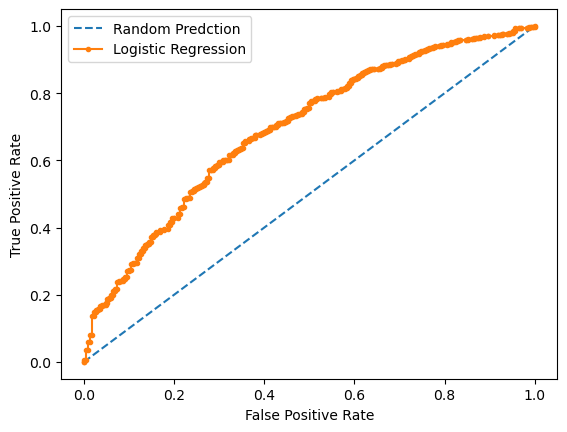

In [23]:
# Calculate the receiver operating curve and the AUC measure

lr_prob=lgstc_reg.predict_proba(x_scaled_test)
lr_prob=lr_prob[:, 1]
ns_prob=[0 for _ in range(len(y_test))]
ns_auc=roc_auc_score(y_test, ns_prob)
lr_auc=roc_auc_score(y_test,lr_prob)
print("AUC random predictions =", ns_auc)
print("AUC predictions from logistic regression model =", lr_auc)
ns_fpr,ns_tpr,_=roc_curve(y_test,ns_prob)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_prob)

plt.plot(ns_fpr,ns_tpr,linestyle='--',label='Random Predction')
plt.plot(lr_fpr,lr_tpr,marker='.',label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Model 2: Decision Tree

## Set Decision Tree parameters

In [42]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer, roc_auc_score

In [ ]:
# Define the parameter grid
param_grid = {
    'criterion': ['entropy', 'gini'], # Try two criterion with "entropy" and "gini"
    'max_depth': range(1, 10), # Try the max depth from 1 to 10
    'min_samples_split': range(100, 1100, 200), # Try sample split number from 100 to 1100, step 200
    'min_samples_leaf': range(50, 250, 50), # Try leaf sample number from 50 to 250, step 50
}

# Use AUC as the scoring function
auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

# Perform grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, scoring=auc_scorer, cv=5)

# Fit the model
grid_search.fit(x_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Train the decision tree with the best parameters
best_params = grid_search.best_params_
model = DecisionTreeClassifier(**best_params, random_state=0).fit(x_train, y_train.astype(int))



In [ ]:
# Plot Decision Tree
plt.figure(figsize=(40, 30))
plot_tree(model, filled=True, feature_names= x_train.columns, proportion=True)
plt.show()

## ROC curve for Decision Tree

In [ ]:
# Compute prediction probabilities
pred_proba = model.predict_proba(x_test)[:, 1]  # Change 'clf' to 'model', 'Q' to 'pred_proba', and 'x_test' to 'X_test'

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, pred_proba)  # Change 'Q' to 'pred_proba'
roc_auc = auc(fpr, tpr)  # Area Under the Curve (AUC)

print(f"The AUC of the model is: {roc_auc}")

In [ ]:
# Format the plot size

plt.figure(figsize=(8, 6)) 
lw = 1.5

# Plot the ROC curve and show the AUC
plt.plot(fpr, tpr, color = 'darkorange', marker='.',
        lw = lw, label = 'Decision Tree (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0,1], color = 'navy', lw=lw, linestyle='--',
        label = 'Random Prediction (AUC = 0.5)')

# Format the figure 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characterlistic curve')
plt.legend(loc = "lower right")
plt.show() # Show anything